# Módulo IV: Modelación no supervisada
## Hierarchical clustering


### Actividad 1
* Tomar el dataset `blobs_kmeans` y:
    * Graficar la información con un plot de tipo _scatter_.
    * Generar un algoritmo de HAC.
    * Generar un dendrograma. 
    * Generar clústers ideales mediante el método del codo. 
    * Probar otros métodos de distancia y _linkage_. 
    * Generar un iterativo para definir un consenso de método de codo. 


### Actividad 2
* Tomar el set de `blobs_kmeans_act1` y: 
    * Graficar en 3D tus puntos. 
        * Responde: Visualmente, ¿cuántos clústers hay?
    * Haz una exploración por distintos métodos de linkage y escoge el mejor. Responde:
        * ¿Por qué lo escogiste? 
        * Explica cómo funcionan la metodología que escogiste. 
    * Genera un dendrograma y una elección por método de codo. 
        * Responde: ¿Los clústers elegidos corresponden con lo que visualmente habías dicho en el primer punto? 
    * Investiga sobre la función `AgglomerativeClustering` de  `Scikit learn`. 
        * Dada las métricas de distancia, _linkage_ y cantidad de clústers elegidos, implementa la función en cuestión.
            * Pista: Usa los parámetros `n_clusters`, `affinity` y `linkage`. 
            * Pista II: Inicializa tu clase `AgglomerativeClustering` y aplica el método `fit_predict`. 
            * El método se aplica algo así: `AgglomerativeClustering(...).fit_predict(el dataframe)`
        * Pega el vector de datos al dataframe original. 
        * Responde:
            * ¿A qué clase (clúster) corresponden las muestras `100`, `750` y `500`? 
            * ¿De qué sirve probar distintas métricas de distancia y de _linkage_? 
        


    


In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt 
from math import ceil

plt.style.use('ggplot')

El _hierarchical clustering_ es otro algoritmo no supervisado que nos permite identificar puntos en grupos dadas ciertas características comunes. 



### Actividad 1: 



Leyendo datos: 

In [6]:
df = pd.read_csv('blobs_kmeans.csv')
df.head()

,Peso_en_kg,Temperatura_de_almacenamiento
0,2.927591,-5.686304
1,4.263600,-5.370701
2,9.789274,3.546634
3,8.034058,0.633774
4,8.761297,4.028652


Visualización de datos: 

Text(0.5, 1.0, 'Grupos de alimentos')

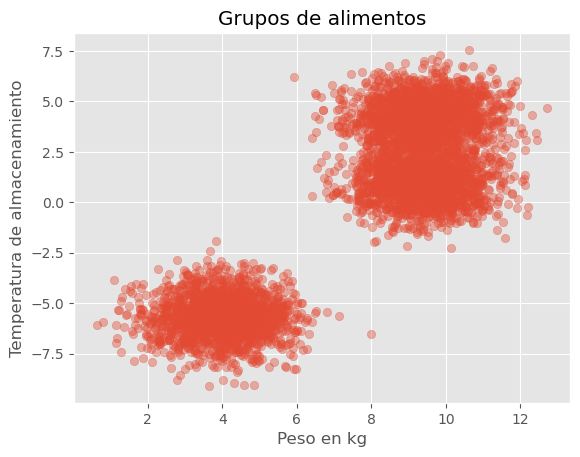

In [8]:
plt.scatter(df['Peso_en_kg'],
            df['Temperatura_de_almacenamiento'], alpha=0.4)
plt.xlabel('Peso en kg')
plt.ylabel('Temperatura de almacenamiento')

plt.title('Grupos de alimentos')

Estandarizando antes de generar clústers:

In [12]:
df_standard = (df - df.mean()) / df.std()

Usaremos una implementación de `Scipy` para generar el proceso. El método utilizado `linkage` recibe 3 argumentos principales:

* `y`: Matriz de datos. 
* `method`: Método de linkage.
* `metric`: Distancia entre puntos. 

In [16]:
hac = linkage(df_standard, method='single', metric='euclidean')

In [18]:
hac

array([[2.97800000e+03, 4.87800000e+03, 2.49866368e-04, 2.00000000e+00],
       [6.20000000e+01, 2.10900000e+03, 3.10555745e-04, 2.00000000e+00],
       [1.36800000e+03, 2.91000000e+03, 4.04583407e-04, 2.00000000e+00],
       ...,
       [2.53900000e+03, 9.99500000e+03, 2.78321118e-01, 3.33400000e+03],
       [8.02000000e+02, 9.98900000e+03, 3.82824027e-01, 1.66600000e+03],
       [9.99600000e+03, 9.99700000e+03, 8.80671975e-01, 5.00000000e+03]])

La representación anterior es una `linkage matrix`. 

* Los primeros dos elementos representan clústers uniéndose. 
* El tercer elemento representa la distancia entre los clústers. 
* El cuarto elemento es el tamaño del nuevo clúster. 

El método que utilizaremos tiene 3 argumentos básicos: 

* `Z`: La matriz de enlace. 
* `truncate_mode`: Método de truncado para fácil visualización. Sus opciones son:
    * None: Ningún truncado. 
    * `lastp`: Los últimos `p` clústers formados por grupos de más de una instancia. 
    * `level`: Usado para indicar niveles del dendrograma.
* `p`: Cantidad de niveles en caso de que `truncate_mode='level'`



Método en `scipy`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html




Text(0.5, 0, 'Datos')

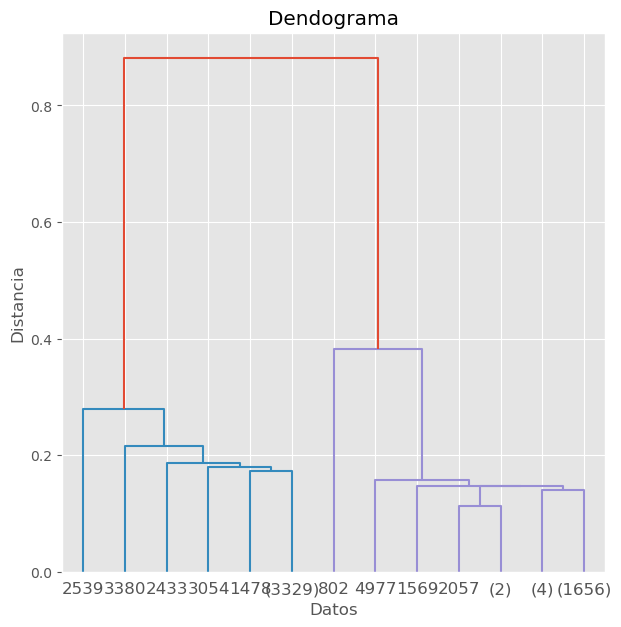

In [24]:
fig, ax = plt.subplots(figsize = (7,7))
dendrogram(hac, p=5, truncate_mode='level',ax=ax)
ax.set_title('Dendograma')
ax.set_ylabel('Distancia')
ax.set_xlabel('Datos')
                       

### ¿Cómo elegir el corte? 
#### Criterio del codo 

In [26]:
distances = hac[:,2]

Estas son todas las distancias pero, ¿qué estamos viendo? 

In [28]:
hac[-10::]

array([[4.97700000e+03, 9.98800000e+03, 1.56548153e-01, 1.66500000e+03],
       [9.90700000e+03, 9.98600000e+03, 1.57156041e-01, 3.32800000e+03],
       [1.78200000e+03, 9.99000000e+03, 1.62654161e-01, 3.32900000e+03],
       [1.47800000e+03, 9.99100000e+03, 1.72042413e-01, 3.33000000e+03],
       [3.05400000e+03, 9.99200000e+03, 1.79189272e-01, 3.33100000e+03],
       [2.43300000e+03, 9.99300000e+03, 1.85957862e-01, 3.33200000e+03],
       [3.38000000e+03, 9.99400000e+03, 2.14935319e-01, 3.33300000e+03],
       [2.53900000e+03, 9.99500000e+03, 2.78321118e-01, 3.33400000e+03],
       [8.02000000e+02, 9.98900000e+03, 3.82824027e-01, 1.66600000e+03],
       [9.99600000e+03, 9.99700000e+03, 8.80671975e-01, 5.00000000e+03]])

In [30]:
turned_distances= distances[::-1]
turned_distances

array([8.80671975e-01, 3.82824027e-01, 2.78321118e-01, ...,
       4.04583407e-04, 3.10555745e-04, 2.49866368e-04])

Ahora sí, grafiquemos. 

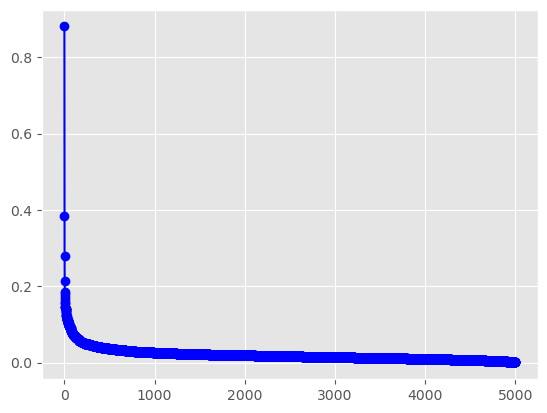

In [32]:
index = range(len(turned_distances))

fig, ax = plt.subplots()
ax.plot(index, turned_distances, marker='o', color='blue')

Poco se puede apreciar, saquemos las diferencias y veamos qué pasa. 

In [34]:
diffs = turned_distances[1::] - turned_distances[:-1]

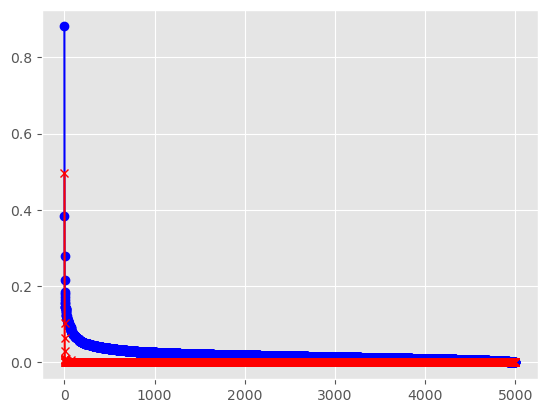

In [36]:
plt.plot(index, turned_distances, marker='o', color='blue')
plt.plot(index[1::], abs(diffs), color='red', marker='x')

Sigue sin verse nada, acortemos al máximo. Recordemos que los clústers en realidad empiezan desde "2" (agrupación de al menos dos datos). 

In [38]:
ideal_cluster = abs(diffs).argmax() + 2
ideal_cluster

2

Los clústers "ideales" son dos. Repitamos la gráfica con un límite de 10 datos sabiendo de antemano que el ideal es 2. 

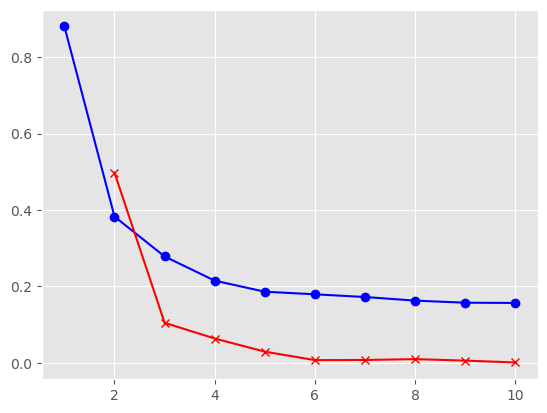

In [42]:
best_turned_distances = turned_distances[0:10]
diffs = abs(best_turned_distances[1::]-best_turned_distances[:-1])

index = range(1,len(best_turned_distances) + 1)
plt.plot(index, best_turned_distances, marker='o', color='blue')
plt.plot(index[1::], abs(diffs), color='red', marker='x')
            

La primer posición de las diferencias es el máximo, quiere decir que en la segunda agrupación fue donde en realidad donde hay una diferencia y a partir de ahí pocos cambios. 

**La separación óptima** en este set es de **dos clústers**.

Veamos cómo cambiaría nuestro dendrograma si usáramos otro método de _linkage_: 

In [44]:
hac = linkage(df_standard, method='ward', metric='euclidean')

Text(0.5, 0, 'Datos')

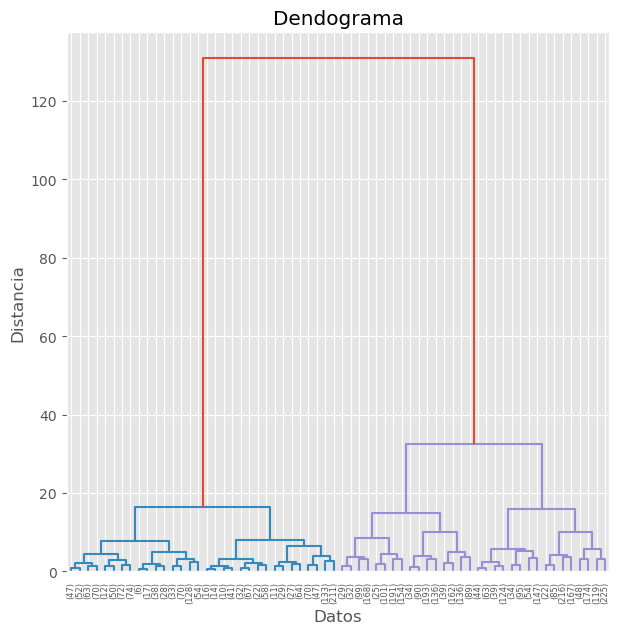

In [45]:
fig, ax = plt.subplots(figsize = (7,7))
dendrogram(hac, p=5, truncate_mode='level',ax=ax)
ax.set_title('Dendograma')
ax.set_ylabel('Distancia')
ax.set_xlabel('Datos')

Hay mucha mayor distancia entre varios grupos. Intentemos ahora con distancia manhattan y otro método de linkage.

Text(0.5, 0, 'Datos')

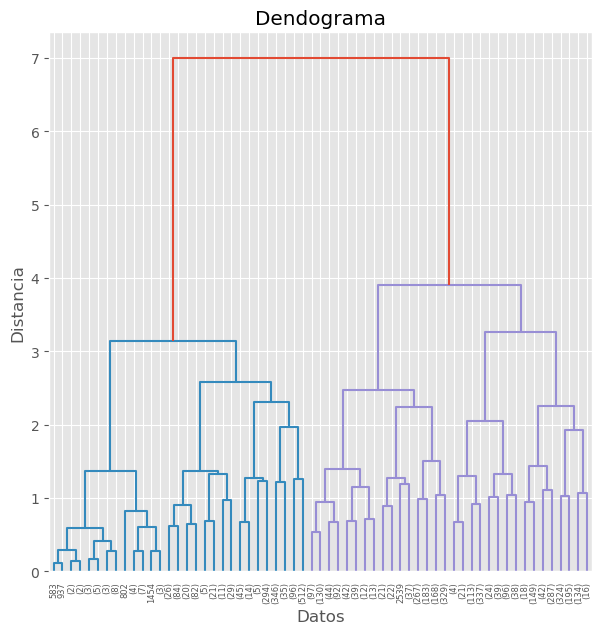

In [48]:
hac = linkage(df_standard, method='complete', metric='cityblock')

fig, ax = plt.subplots(figsize = (7,7))
dendrogram(hac, p=5, truncate_mode='level',ax=ax)
ax.set_title('Dendograma')
ax.set_ylabel('Distancia')
ax.set_xlabel('Datos')

Los resultados pueden variar, además aun no sabemos cuánto clústers elegir. Generamos un proceso iterativo de distintas distancias y distintos linkages para después generar selección de clústers.

In [ ]:
distances = ['euclidean', 'cityblock', 'cosine']
linkages = ['single', 'complete', 'average', 'ward', 'centroid']

results = {}

for distance in distances:
    for link in linkages:
        if distance != 'euclidean' and link in ['ward', 'centroid']:
            continue
        hac = linkage(df_standard, methot

In [ ]:
cols = 3
rows = ceil(len(results) / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))
keys = list(results.keys())

for index, ax in enumerate(axes.flat): 
    try:
        hac_type = keys[index]
    except:
        ax.axis('off')
        continue
    result = results[hac_type]
    dendrogram(hac, p=5, truncate_mode='level',ax=ax)
    ax.set_title('Dendograma')
    ax.set_ylabel('Distancia')
    ax.set_xlabel('Datos')
fig.tight_layout()

Hagamos distintas pruebas con varios métodos de distancia y varios métodos de linkage para hacer un consenso final. 

In [ ]:
cols = 3
rows = ceil(len(results) / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))
keys = list(results.keys())

for index, ax in enumerate(axes.flat): 
    try:
        hac_type = keys[index]
    except:
        ax.axis('off')
        continue
    result = results[hac_type]

    distances = result[:,2]
    turned_distances = distances[::-1][0:10]
    diffs = abs(turned_distances[1::] - turned_distances[:-1]

    ideal_cluster = abs(diffs).argmax() + 2

    index = range(1, len(turned_distances) + 1)
    ax.plot(index, turned_distances, color='blue', marker='o', label='Distance')
    ax.plot(index[1::], diffs, color='red', marker='x', lavel='Deltas')
    ax.legend()

    ax.set_title(f'Elbow method: \n {hac_type} \n

El consenso es unánime. 